In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

results_path = "C:/Users/kubil/Documents/STUDIUM/Master/4_Masterarbeit_Code/IOE-Algo-compare/imt-main/examples/results" 
ring_angles_kl = np.load(os.path.join(results_path, "Angles_IMU_RING_Knee_Left.npy"), allow_pickle=True)
ring_angles_kr = np.load(os.path.join(results_path, "Angles_IMU_RING_Knee_Right.npy"), allow_pickle=True)
cam_angles_kl = np.load(os.path.join(results_path, "Angles_CAM_Knee_Left.npy"), allow_pickle=True)
cam_angles_kr = np.load(os.path.join(results_path, "Angles_CAM_Knee_Right.npy"), allow_pickle=True)
folder_data_imu = "C:/Users/kubil/Documents/STUDIUM/Master/4_Masterarbeit_Code/IOE-Algo-compare/Daten/Dict_Frames/"
filenames_imu = [f.name for f in Path(folder_data_imu).rglob('*') if f.is_file()]  # all filnames in array
seq_filter = np.load(os.path.join(results_path, "Sequences_filter.npy"), allow_pickle=True)
seq_names = np.load(os.path.join(results_path, "Sequences_names.npy"), allow_pickle=True)

In [7]:
x = np.empty(0)
x

array([], dtype=float64)

In [17]:
ring_kl_all = []
ring_kr_all = []
cam_kl_all = []
cam_kr_all = []

for i in range(len(ring_angles_kl)):
    if seq_names[i] not in seq_filter:
        ring_kl_all = np.hstack((ring_kl_all, ring_angles_kl[i]))
        ring_kr_all = np.hstack((ring_kr_all, ring_angles_kr[i]))
        cam_kl_all = np.hstack((cam_kl_all, cam_angles_kl[i]))
        cam_kr_all = np.hstack((cam_kr_all, cam_angles_kr[i]))


In [ ]:
if len(cam_kl_all) > len(ring_kl_all):
    smoothed_arr = pd.Series(cam_kl_all).rolling(window=100, center=True).mean().to_numpy()
    smoothed_arr2 = pd.Series(cam_kl_all[:len(ring_kl_all)]).rolling(window=100, center=True, min_periods=1).mean().to_numpy()
    imu_to_camera2d_diff = smoothed_arr - smoothed_arr2
else:
    smoothed_arr = pd.Series(ring_kl_all[:len(cam_kl_all)]).rolling(window=100, center=True).mean().to_numpy()
    smoothed_arr2 = pd.Series(cam_kl_all).rolling(window=100, center=True, min_periods=1).mean().to_numpy()
    imu_to_camera2d_diff = smoothed_arr - smoothed_arr2

if len(cam_kr_all) > len(ring_kr_all):
    smoothed_arr3 = pd.Series(ring_kr_all).rolling(window=100, center=True).mean().to_numpy()
    smoothed_arr4 = pd.Series(cam_kr_all[:len(ring_kr_all)]).rolling(window=100, center=True, min_periods=1).mean().to_numpy()
    imu_to_camera2d_diff2 = smoothed_arr3 - smoothed_arr4
else:
    smoothed_arr3 = pd.Series(ring_kr_all[:len(cam_kr_all)]).rolling(window=100, center=True).mean().to_numpy()
    smoothed_arr4 = pd.Series(cam_kr_all).rolling(window=100, center=True, min_periods=1).mean().to_numpy()
    imu_to_camera2d_diff2 = smoothed_arr3 - smoothed_arr4


        
ylim_min=min(min(imu_to_camera2d_diff[~np.isnan(imu_to_camera2d_diff)]),min(imu_to_camera2d_diff2[~np.isnan(imu_to_camera2d_diff2)]))-20
ylim_max=max(max(imu_to_camera2d_diff[~np.isnan(imu_to_camera2d_diff)]),max(imu_to_camera2d_diff2[~np.isnan(imu_to_camera2d_diff2)]))+20


In [25]:
np.ndim(imu_to_camera2d_diff)

1

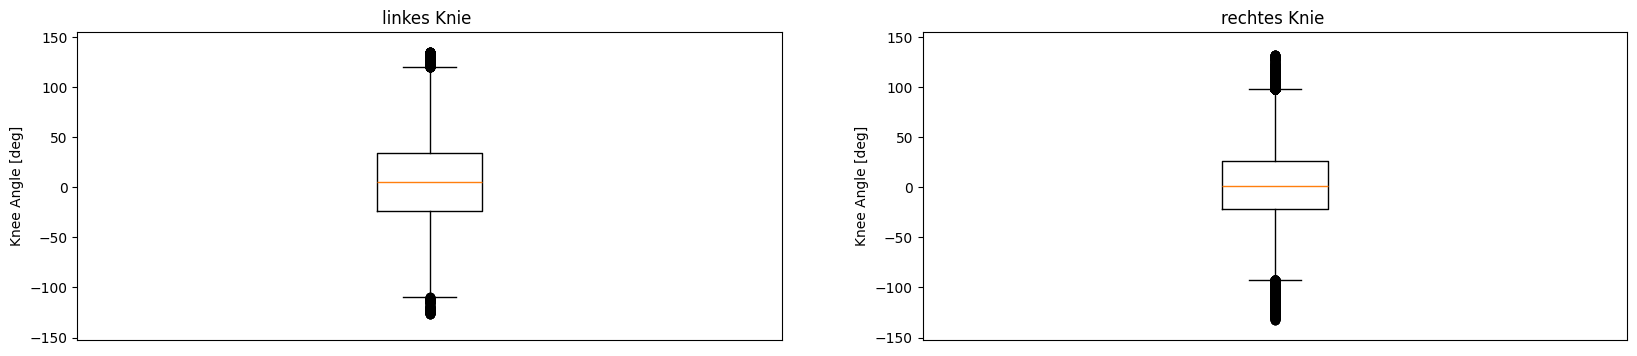

In [33]:
# Erstellen des Plots mit 1x2 Subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 4))

# Boxplots in einzelnen Subplots
# Boxplot linkes Knie
axes[0].boxplot(imu_to_camera2d_diff[~np.isnan(imu_to_camera2d_diff)])
axes[0].set_title("linkes Knie ")
axes[0].set_ylabel("Knee Angle [deg]")
axes[0].set_ylim(ylim_min,ylim_max)
axes[0].get_xaxis().set_visible(False)

# Boxplot rechtes Knie
axes[1].boxplot(imu_to_camera2d_diff2[~np.isnan(imu_to_camera2d_diff2)])
axes[1].set_title("rechtes Knie ")
axes[1].set_ylabel("Knee Angle [deg]")
axes[1].set_ylim(ylim_min,ylim_max)
axes[1].get_xaxis().set_visible(False)
